## 5주차 과제_심고은

#### **관련 라이브러리**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

#pip install missingno
#pip install fancyimpute
#pip install xgboost

import missingno as msno #결측치 확인 라이브러리 
from fancyimpute import IterativeImputer #다중대체 라이브러리
import seaborn.objects as so #seaborn의 다른 라이브러리

import warnings #Warning 메세지 뜨지 않도록
warnings.filterwarnings('ignore')

import os #작업 디렉토리 관련 라이브러리

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

#### **1. 1차 전처리 마친 데이터셋 불러오기**

In [5]:
os.chdir('/Users\sim\Desktop/BAF/Dataset/따릉이')
os.getcwd()

'C:\\Users\\sim\\Desktop\\BAF\\Dataset\\따릉이'

In [6]:
train_data = pd.read_csv('train_clean.csv')
df_train = train_data.copy()

In [7]:
df_train.isna().sum() #결측치 없음

Date                               0
Rented Bike Count                  0
Hour                               0
Temperature(째C)                    0
Humidity(%)                        0
Wind speed (m/s)                   0
Visibility (10m)                   0
Dew point temperature(째C)          0
Solar Radiation (MJ/m2)            0
Rainfall(mm)                       0
Snowfall (cm)                      0
Seasons                            0
Holiday                            0
Functioning Day                    0
year                               0
month                              0
day                                0
weekday                            0
log-transformed Solar Radiation    0
dtype: int64

In [8]:
test_data = pd.read_csv('test_clean.csv')
df_test = test_data.copy()

In [9]:
df_test.isna().sum() #결측치 없음

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
year                         0
month                        0
day                          0
weekday                      0
dtype: int64

#### **2. 2차 전처리**

#### **2-1. 범주형 데이터 수치화**

In [10]:
ohe = OneHotEncoder(sparse_output=False)
result_ohe = ohe.fit_transform(df_train[['Seasons','Holiday']])
result_ohe

array([[0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.]])

In [11]:
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [12]:
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(['Seasons','Holiday']))
df_ohe

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
8035,1.0,0.0,0.0,0.0,0.0,1.0
8036,1.0,0.0,0.0,0.0,0.0,1.0
8037,1.0,0.0,0.0,0.0,0.0,1.0
8038,1.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df_train = pd.concat([df_train, df_ohe], axis=1)
df_train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),...,month,day,weekday,log-transformed Solar Radiation,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,12,1,Friday,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,12,1,Friday,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,12,1,Friday,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,12,1,Friday,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.0,0.0,...,12,1,Friday,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
result_ohe = ohe.fit_transform(df_test[['Seasons','Holiday']])
result_ohe

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [15]:
ohe.categories_

[array(['Autumn'], dtype=object), array(['No Holiday'], dtype=object)]

In [16]:
df_ohe2 = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(['Seasons','Holiday']))
df_ohe2

,Seasons_Autumn,Holiday_No Holiday
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
715,1.0,1.0
716,1.0,1.0
717,1.0,1.0
718,1.0,1.0


In [17]:
df_test = pd.concat([df_test, df_ohe2], axis=1)
df_test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday,Seasons_Autumn,Holiday_No Holiday
0,2018-11-01,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,Thursday,1.0,1.0
1,2018-11-01,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,Thursday,1.0,1.0
2,2018-11-01,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,Thursday,1.0,1.0
3,2018-11-01,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,Thursday,1.0,1.0
4,2018-11-01,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,1,Thursday,1.0,1.0


#### **2-2. 순서형 변수 라벨인코딩(4주차 과제에서는 weekday를 2-1.에 포함시켜 진행했지만, 따로 라벨인코딩을 진행함.)**
##### weekday
##### monday=0 >>> sunday=6
##### df_train과 df_test에 함께 적용

In [18]:
df_train['weekday2'] = df_train['weekday'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})
df_test['weekday2'] = df_test['weekday'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})

#### **2-3. 필요없는 열 제거**

In [19]:
df_train = df_train.drop(['Date','Seasons','Holiday','Functioning Day','weekday'], axis=1)
df_test = df_test.drop(['Date','Seasons','Holiday','Functioning Day','weekday'], axis=1)

#### **3. train, valid, test 셋 분리**

In [20]:
X = df_train.drop('Rented Bike Count', axis=1)
y = df_train['Rented Bike Count']

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6432, 20) (1608, 20) (6432,) (1608,)


#### **4. 변수 스케일링**

#### 4-1. Standard Scaler : 가장 일반적인 방법으로 평균을 0으로, 분산을 1인 정규분포로 조정

In [22]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)

print("train")
print(f'평균: {X_train_scaler.mean()}\n분산: {X_train_scaler.std()}')

train
평균: -1.711317654748702e-14
분산: 1.0


In [23]:
X_val_scaler = scaler.transform(X_val)

print("valid")
print(f'평균: {X_val_scaler.mean()}\n분산: {X_val_scaler.std()}')

valid
평균: -0.003492939657103318
분산: 0.9901904491964756


#### 4-2. MinMax Scaler : 최댓값과 최솟값을 사용하여 값의 분포를 [0,1]로 정규화


In [24]:
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)

print("train")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')

train
최대: 1.0000000000000002
최소: 0.0


In [25]:
X_val_mms = mms.transform(X_val)

print("valid")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

valid
최대: 1.0000000000000002
최소: -0.00560652395514781


#### 4-3. MaxAbs Scaler : 값의 절댓값이 [0,1]이 되도록 조정


In [26]:
mas = MaxAbsScaler()

X_train_mas = mas.fit_transform(X_train)

print("train")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')

train
최대: 1.0
최소: -1.0


In [27]:
X_val_mas = mas.transform(X_val)

print("valid")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

valid
최대: 1.0
최소: -0.9705882352941175


#### 4-4. Robust Scaler : 중앙값과 사분위수를 이용하여 값의 분포를 조정


In [28]:
rs = RobustScaler()

X_train_rs = rs.fit_transform(X_train)

print("train")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')

train
평균: 0.09650457015680036
분산: 0.6276508156836258


In [29]:
X_val_rs = rs.transform(X_val)

print("valid")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

valid
평균: 0.09391676914092348
분산: 0.6232446848797736


In [30]:
X_test = df_test.copy()

#### 5. 모델 학습

#### 5-1. Decision Tree

In [31]:
decisiontree_model=DecisionTreeRegressor(random_state=42)

In [32]:
decisiontree_model.fit(X_train, y_train).get_params() #하이퍼파라미터 확인

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [33]:
predict = decisiontree_model.predict(X_val)

r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
mse = mean_squared_error(y_val, predict) 
rmse = np.sqrt(mean_squared_error(y_val, predict))

print("R^2: %f" % (r_squared))
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

R^2: 0.751706
MAE: 167.734453
MSE: 108925.626244
RMSE: 330.038825


#### 5-2. Random Forest

In [34]:
randomforest_model = RandomForestRegressor(random_state=42)

In [35]:
randomforest_model.fit(X_train, y_train).get_params() #하이퍼파라미터 확인

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [36]:
predict = randomforest_model.predict(X_val)

r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
mse = mean_squared_error(y_val, predict) 
rmse = np.sqrt(mean_squared_error(y_val, predict))

print("R^2: %f" % (r_squared))
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

R^2: 0.889121
MAE: 117.044751
MSE: 48642.240200
RMSE: 220.549859


#### 5-3. XGBoost

In [37]:
xgboost_model = XGBRegressor(random_state=42)

In [38]:
xgboost_model.fit(X_train, y_train).get_params() #하이퍼파라미터 확인

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [39]:
predict = xgboost_model.predict(X_val)

r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
mse = mean_squared_error(y_val, predict) 
rmse = np.sqrt(mean_squared_error(y_val, predict))

print("R^2: %f" % (r_squared))
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

R^2: 0.926715
MAE: 108.293685
MSE: 32150.048994
RMSE: 179.304347


#### 5-4. Linear Regression

In [40]:
linearregression_model = LinearRegression()

In [41]:
linearregression_model.fit(X_train, y_train).get_params() #하이퍼파라미터 확인

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
predict = linearregression_model.predict(X_val)

r_squared = r2_score(y_val, predict)
mae = mean_absolute_error(y_val, predict)
mse = mean_squared_error(y_val, predict) 
rmse = np.sqrt(mean_squared_error(y_val, predict))

print("R^2: %f" % (r_squared))
print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

R^2: 0.537031
MAE: 340.019730
MSE: 203103.059880
RMSE: 450.669568


#### Decision Tree R^2 : 0.75...
#### Random Forest R^2 : 0.88...
#### XGBoost R^2 : 0.92...
#### Linear Regression R^2 : 0.53...

#### 따라서, XGBoost를 대상으로 하이퍼파라미터 튜닝(수행시간이 길지만 정확도가 높다는 장점)3... 

#### 1. learning_rate(학습률) : 새로운 모델의 가중치 결정, 학습률이 낮으면 더 많은 모델이 필요하지만 더 나은 성능을 얻음
#### 2. n_estimators(트리 개수) : 모델이 학습하는 결정 트리의 개수 결정, 더 많은 트리가 더 복잡한 모델 만듦, 과적합의 위험 증가
#### 3. max_depth(트리 깊이) : 각 결정 트리의 최대 깊이 제한, 깊이가 깊은 트리는 더 복잡한 패턴 학습, 과적합의 위험 있음
#### 4. subsample : 각 트리 모델 학습 시 사용되는 샘플 데이터의 비율
#### 5. colsample_bytree : 각 트리 모델 학습 시 사용되는 특성 데이터의 비율

In [43]:
model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#### GridSearch

In [44]:
GridSearch = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
GridSearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [45]:
from math import sqrt
print(sqrt(abs(GridSearch.best_score_)))
print("Best:", GridSearch.best_params_)

190.32419088122674
Best: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [46]:
best_model = GridSearch.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### ManualSearch 통해 수동으로 하이퍼파라미터 조정

In [47]:
ms_model = XGBRegressor(random_state = 42, n_estimators = 200, max_depth = 9)

ms_model.fit(X_train, y_train)

pred = ms_model.predict(X_val)

mae = mean_absolute_error(y_val, pred) 
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 

print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

MAE: 101.373045
MSE: 33113.140547
RMSE: 181.970164


In [48]:
ms_model = XGBRegressor(random_state = 42, n_estimators = 400, max_depth = 9)

ms_model.fit(X_train, y_train)

pred = ms_model.predict(X_val)

mae = mean_absolute_error(y_val, pred) 
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 

print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

MAE: 101.336375
MSE: 33110.350212
RMSE: 181.962497


In [49]:
ms_model = XGBRegressor(random_state = 42, n_estimators = 400, max_depth = 9, learning_rate = 0.1)

ms_model.fit(X_train, y_train)

pred = ms_model.predict(X_val)

mae = mean_absolute_error(y_val, pred) 
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 

print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

MAE: 89.749190
MSE: 28267.032577
RMSE: 168.128024


In [50]:
ms_model = XGBRegressor(random_state = 42, n_estimators = 200, max_depth = 6, learning_rate = 0.05, subsample = 0.8)

ms_model.fit(X_train, y_train)

pred = ms_model.predict(X_val)

mae = mean_absolute_error(y_val, pred) 
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 

print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

MAE: 104.595942
MSE: 32739.095220
RMSE: 180.939479


In [51]:
ms_model = XGBRegressor(random_state=42, n_estimators= 300, max_depth=8, learning_rate=0.05, subsample=0.8)

ms_model.fit(X_train, y_train)

pred = ms_model.predict(X_val)

mae = mean_absolute_error(y_val, pred) 
mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 

print("MAE: %f" % (mae))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

MAE: 89.712698
MSE: 26530.096683
RMSE: 162.880621


#### 하이퍼파라미터 후 > 성능이 더 좋아짐.

#### 변수 중요도

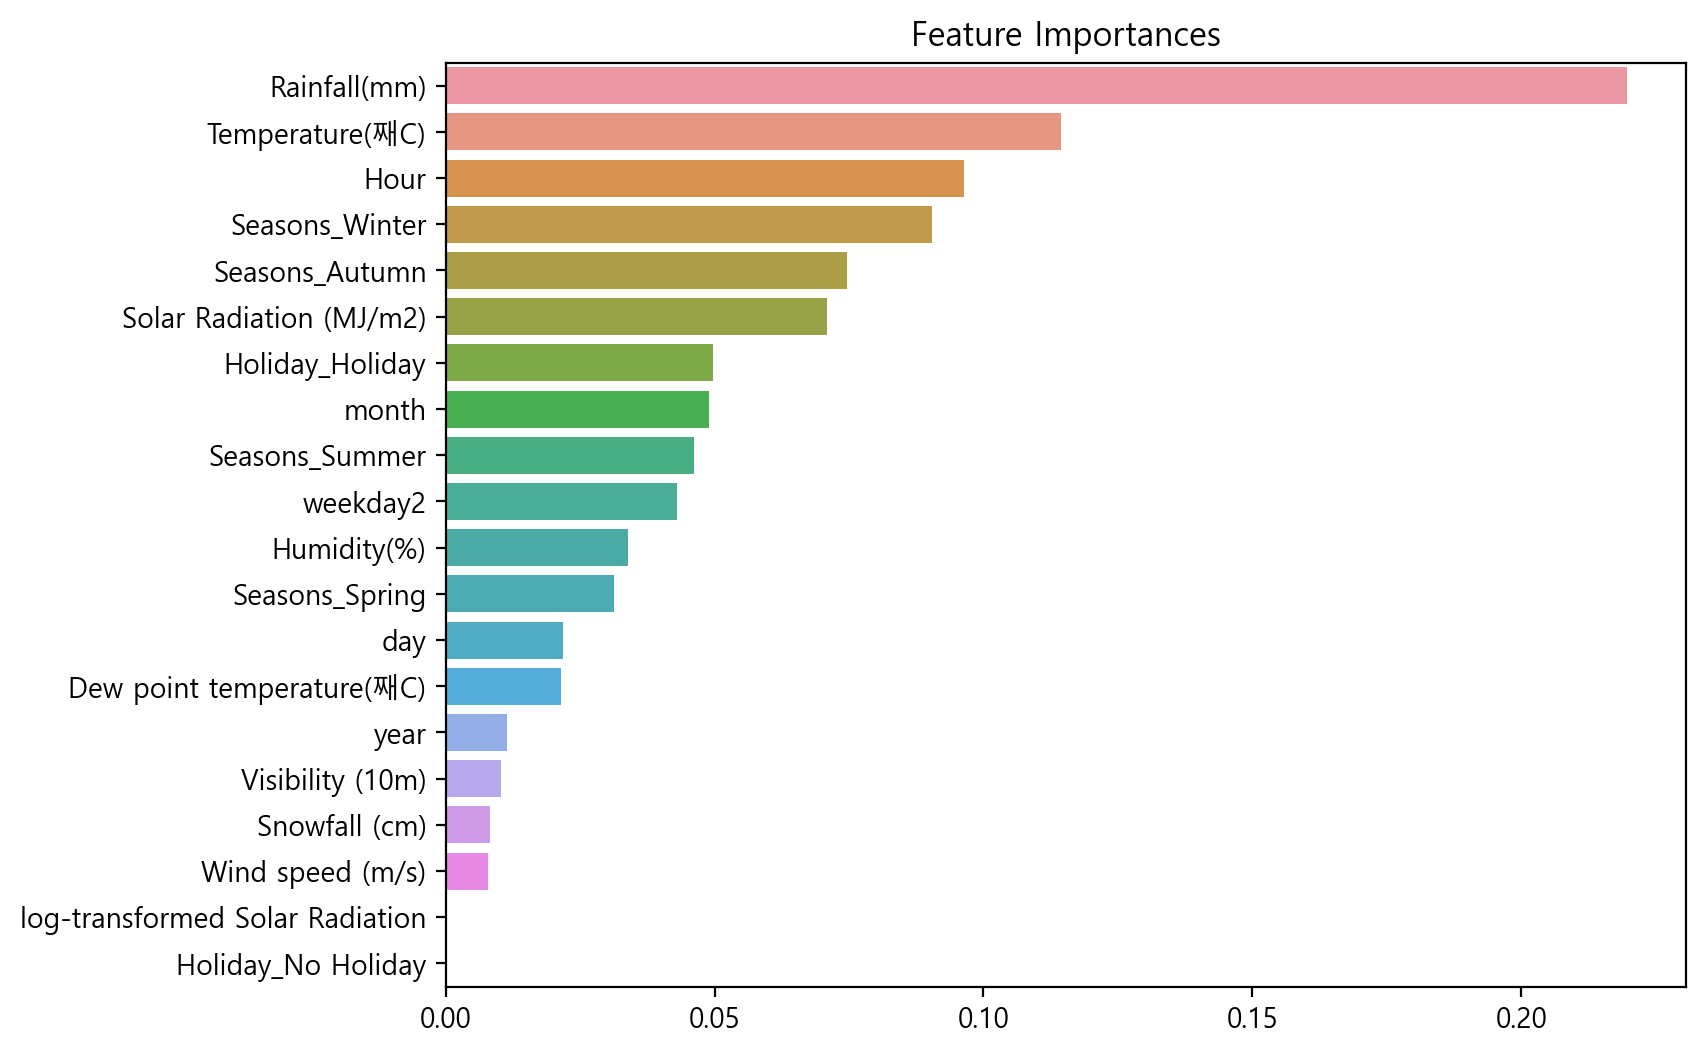

In [52]:
importances_values = pd.Series(ms_model.feature_importances_, index=X_val.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

##### 강우량, 온도, 시간대 순으로 피처에 큰 중요도를 미침.
##### 이를 고려하여 강우량, 온도, 시간대 등의 요소에 따라 따릉이를 관리하는 것이 필요할 것임.

#### 최종 test 모델 예측

In [53]:
#final_model = XGBRegressor(random_state=42, n_estimators= 300, max_depth=8, learning_rate=0.05, subsample=0.8)
#final_model.fit(X_train, y_train)
#df_test['Rented Bike Count'] = final_model.predict(X_test)

#### 오류 발생
#### x_train에는 있지만 X_test에는 없는 변수 찾아서 처리하기

In [54]:
missing_columns = set(X_train.columns) - set(X_test.columns)
for column in missing_columns:
    X_test[column] = 0
X_test = X_test[X_train.columns]

In [55]:
final_model = XGBRegressor(random_state=42, n_estimators= 300, max_depth=8, learning_rate=0.05, subsample=0.8)
final_model.fit(X_train, y_train)
df_test['Rented Bike Count'] = final_model.predict(X_test)

In [56]:
df_test

,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,Seasons_Autumn,Holiday_No Holiday,weekday2,Rented Bike Count
0,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,2018,11,1,1.0,1.0,3,508.190887
1,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,2018,11,1,1.0,1.0,3,370.115875
2,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,2018,11,1,1.0,1.0,3,292.078369
3,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,2018,11,1,1.0,1.0,3,199.480453
4,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,2018,11,1,1.0,1.0,3,157.608917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,2018,11,30,1.0,1.0,4,806.735229
716,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,2018,11,30,1.0,1.0,4,780.908813
717,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,2018,11,30,1.0,1.0,4,739.753723
718,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,2018,11,30,1.0,1.0,4,695.976440


In [57]:
df_test.to_csv('test_fin.csv', index=False)